In [1]:
%cd ..

e:\Safety-Helmet-Object-Detection


In [22]:
from ultralytics import YOLO,settings
settings.update({'mlflow': False})
import mlflow
import optuna
from PIL import Image
import numpy as np
from IPython.display import display


In [8]:
min_epochs=10
max_epochs=37

min_lr0=0.001
max_lr0=0.1

imgsz=[128,256,416]

batch=[8,16,32]


In [9]:
mlflow.set_experiment("Safety-Helmet-Detection")


def objective(trial):

    params = {
        'epochs': trial.suggest_int('epochs',min_epochs,max_epochs),
        'lr0': trial.suggest_float('lr0',min_lr0,max_lr0),
        'imgsz': trial.suggest_categorical('imgsz',imgsz),
        'batch': trial.suggest_categorical('batch',batch),
    }


    with mlflow.start_run(run_name="helmet-detection-run") as run:

        mlflow.autolog()

        model = YOLO("yolo11n.pt")

        model.train(
            data='safety-helmet-1/data.yaml',
            epochs=params['epochs'],
            lr0=params['lr0'],
            imgsz=params['imgsz'],
            batch=params['batch'],
            pretrained=True,
            project="safety_helmet_detection_models",
            name=f"train_trial_{trial.number}",
        )

        metrics = model.val(name=f'evaluation_{trial.number}')
        mAP50 = metrics.box.map


        mlflow.log_params(params)
        mlflow.log_metric('map50',mAP50)


        model_dir = f"safety_helmet_detection_models/train_trial_{trial.number}/weights/best.pt"

        mlflow.log_artifact(model_dir, artifact_path="models")


    return mAP50


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2025-06-24 20:56:04,469] A new study created in memory with name: no-name-a9a1f3f5-7de1-4c8a-a892-a0696550fd63
2025/06/24 20:56:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 20:56:04 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 20:56:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=23, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.07366143166221908, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.4±0.9 ms, read: 308.7±223.2 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.07366143166221908' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_0
Starting training for 23 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/23     0.672G       1.63      2.739      1.284         98        256: 100%|██████████| 63/63 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        117        445      0.969      0.153      0.445      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/23     0.672G      1.528      1.319      1.208        103        256: 100%|██████████| 63/63 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        117        445      0.803      0.763      0.861      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/23     0.672G      1.482      1.195      1.194        100        256: 100%|██████████| 63/63 [00:11<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        117        445      0.791      0.782      0.831      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/23     0.672G      1.468      1.125      1.195        107        256: 100%|██████████| 63/63 [00:09<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]


                   all        117        445      0.776      0.843      0.837      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/23     0.672G       1.44      1.072       1.17         64        256: 100%|██████████| 63/63 [00:10<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        117        445      0.887       0.81      0.902      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/23     0.672G      1.386      1.013      1.164        101        256: 100%|██████████| 63/63 [00:10<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all        117        445      0.934      0.852      0.929      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/23     0.672G      1.385      0.979      1.141        116        256: 100%|██████████| 63/63 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all        117        445      0.886      0.886      0.934      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/23     0.672G       1.36     0.9427      1.138        107        256: 100%|██████████| 63/63 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        117        445      0.905       0.84      0.915      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/23     0.672G      1.339     0.9294      1.129        138        256: 100%|██████████| 63/63 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        117        445      0.888        0.9      0.946      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/23     0.672G      1.328     0.8948       1.12        112        256: 100%|██████████| 63/63 [00:09<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all        117        445      0.912      0.918      0.954      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/23     0.672G      1.325     0.8638      1.106         87        256: 100%|██████████| 63/63 [00:11<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        117        445      0.923      0.906      0.948      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/23     0.672G      1.291     0.8458      1.092        105        256: 100%|██████████| 63/63 [00:10<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        117        445      0.929      0.926      0.962      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/23     0.672G      1.256     0.8236      1.088         63        256: 100%|██████████| 63/63 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        117        445       0.94      0.938      0.967      0.649


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/23     0.672G       1.21     0.7801      1.071         45        256: 100%|██████████| 63/63 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all        117        445      0.898      0.939      0.956      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/23     0.672G      1.198     0.7558      1.073         40        256: 100%|██████████| 63/63 [00:09<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        117        445      0.916       0.95      0.967      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/23     0.672G      1.184     0.7233      1.058         59        256: 100%|██████████| 63/63 [00:09<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        117        445      0.933      0.956      0.965      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/23     0.672G      1.154     0.6986      1.054         57        256: 100%|██████████| 63/63 [00:10<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all        117        445      0.943      0.951      0.976       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/23     0.672G      1.142     0.6768      1.045         81        256: 100%|██████████| 63/63 [00:10<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all        117        445       0.94      0.953      0.968      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/23     0.672G      1.132     0.6598      1.034         72        256: 100%|██████████| 63/63 [00:10<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        117        445      0.944      0.965      0.971      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/23     0.672G       1.12     0.6397      1.029         60        256: 100%|██████████| 63/63 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        117        445      0.947      0.968      0.975      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/23     0.672G      1.105     0.6318      1.029         62        256: 100%|██████████| 63/63 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        445      0.945      0.961      0.975      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/23     0.672G      1.082     0.6046       1.02         91        256: 100%|██████████| 63/63 [00:10<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

                   all        117        445      0.948      0.959      0.977      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/23     0.672G      1.081     0.6076      1.014         40        256: 100%|██████████| 63/63 [00:10<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        117        445      0.944       0.96      0.976      0.702



23 epochs completed in 0.075 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_0/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_0/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_0/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]


                   all        117        445      0.944       0.96      0.976      0.703
                  helm         61        150      0.976      0.947      0.983      0.724
               no-helm         56        295      0.911      0.973      0.968      0.681
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_0
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 830.4±273.8 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]


                   all        117        445      0.944       0.96      0.976      0.701
                  helm         61        150      0.977      0.947      0.984      0.722
               no-helm         56        295      0.911      0.973      0.968      0.681
Speed: 1.8ms preprocess, 4.3ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_0


[I 2025-06-24 21:00:51,571] Trial 0 finished with value: 0.701451709213001 and parameters: {'epochs': 23, 'lr0': 0.07366143166221908, 'imgsz': 256, 'batch': 16}. Best is trial 0 with value: 0.701451709213001.
2025/06/24 21:00:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:00:51 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:00:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=36, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.07132411438945149, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 356.1±149.9 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.07132411438945149' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_1
Starting training for 36 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/36     0.477G      2.202      3.283      1.318         99        128: 100%|██████████| 63/63 [00:10<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        117        445      0.899      0.207      0.294      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/36     0.477G      2.031      1.672       1.17        103        128: 100%|██████████| 63/63 [00:10<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        117        445      0.727      0.545      0.639      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/36     0.477G      1.917      1.316      1.162        100        128: 100%|██████████| 63/63 [00:07<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        117        445      0.655      0.613      0.637      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/36     0.477G      1.846      1.213       1.15        106        128: 100%|██████████| 63/63 [00:08<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all        117        445      0.776      0.705      0.721       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/36     0.477G      1.799      1.175       1.14         62        128: 100%|██████████| 63/63 [00:09<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all        117        445      0.716      0.666      0.738       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/36     0.477G      1.729      1.094      1.119         99        128: 100%|██████████| 63/63 [00:09<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        445      0.798      0.677      0.768      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/36     0.477G      1.746      1.088      1.111        114        128: 100%|██████████| 63/63 [00:08<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        117        445      0.722      0.695      0.756      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/36     0.477G      1.697      1.056      1.103        109        128: 100%|██████████| 63/63 [00:08<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all        117        445      0.854      0.756      0.823       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/36     0.477G      1.641      1.037      1.084        136        128: 100%|██████████| 63/63 [00:09<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        117        445      0.834      0.667      0.798      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/36     0.477G      1.663      1.023      1.095        108        128: 100%|██████████| 63/63 [00:09<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        117        445      0.803      0.803       0.85      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/36     0.477G      1.668      1.011      1.087         87        128: 100%|██████████| 63/63 [00:07<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        117        445      0.879      0.764      0.867      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/36     0.477G      1.619     0.9753      1.067        105        128: 100%|██████████| 63/63 [00:09<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all        117        445      0.836      0.789      0.852      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/36     0.477G       1.58     0.9642      1.069         63        128: 100%|██████████| 63/63 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all        117        445      0.864      0.795      0.857      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/36     0.477G      1.614     0.9739      1.072        104        128: 100%|██████████| 63/63 [00:08<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        117        445      0.865      0.808      0.866      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/36     0.477G      1.595     0.9393      1.072        104        128: 100%|██████████| 63/63 [00:08<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        117        445      0.895      0.804      0.864       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/36     0.477G      1.558     0.9426      1.056        102        128: 100%|██████████| 63/63 [00:09<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all        117        445      0.859      0.855      0.901      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/36     0.477G      1.567     0.9448      1.052        123        128: 100%|██████████| 63/63 [00:09<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        117        445      0.861      0.802      0.874      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/36     0.477G      1.542     0.9231      1.048        102        128: 100%|██████████| 63/63 [00:07<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all        117        445      0.892      0.826      0.896      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/36     0.477G      1.541     0.9107      1.044        101        128: 100%|██████████| 63/63 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]

                   all        117        445      0.879      0.781      0.885       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/36     0.477G      1.558     0.9087      1.046        104        128: 100%|██████████| 63/63 [00:09<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all        117        445       0.88       0.83      0.895      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/36     0.477G      1.517     0.8898      1.049         73        128: 100%|██████████| 63/63 [00:08<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        117        445      0.867      0.829      0.891      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/36     0.477G      1.471     0.8606      1.031         68        128: 100%|██████████| 63/63 [00:07<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        117        445      0.923       0.79       0.89      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/36     0.477G      1.491      0.863      1.033        126        128: 100%|██████████| 63/63 [00:09<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all        117        445      0.893       0.85      0.901      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/36     0.477G      1.479     0.8693      1.036         90        128: 100%|██████████| 63/63 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all        117        445      0.925      0.802      0.901      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/36     0.477G       1.42     0.8216      1.018         68        128: 100%|██████████| 63/63 [00:08<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        117        445      0.895      0.834      0.895      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/36     0.477G      1.467     0.8527      1.029         97        128: 100%|██████████| 63/63 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all        117        445       0.87      0.852      0.908      0.564


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/36     0.477G      1.383     0.8245       1.04         46        128: 100%|██████████| 63/63 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all        117        445       0.88      0.853      0.899      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/36     0.477G      1.352     0.7794      1.027         65        128: 100%|██████████| 63/63 [00:09<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all        117        445       0.92      0.833      0.917      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/36     0.477G      1.345     0.7518      1.016         47        128: 100%|██████████| 63/63 [00:07<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        117        445      0.926      0.836      0.922      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/36     0.477G      1.339     0.7449      1.007         60        128: 100%|██████████| 63/63 [00:08<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        117        445      0.902      0.835      0.903      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/36     0.477G      1.347     0.7555      1.019         67        128: 100%|██████████| 63/63 [00:09<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        117        445      0.896      0.872      0.923      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/36     0.477G      1.297     0.7253      1.005         49        128: 100%|██████████| 63/63 [00:08<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        117        445      0.928      0.842      0.927      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/36     0.477G      1.294      0.711      1.006         68        128: 100%|██████████| 63/63 [00:07<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all        117        445      0.916      0.841       0.92      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/36     0.477G       1.29      0.708      1.005         46        128: 100%|██████████| 63/63 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        117        445       0.92      0.836      0.928      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/36     0.477G      1.284     0.7072      1.003         85        128: 100%|██████████| 63/63 [00:09<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        117        445      0.895      0.874       0.93      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/36     0.477G      1.277     0.6986      1.001         52        128: 100%|██████████| 63/63 [00:07<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        117        445      0.903      0.878      0.935      0.593



36 epochs completed in 0.103 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_1/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_1/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_1/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]


                   all        117        445      0.903      0.878      0.935      0.593
                  helm         61        150      0.897      0.833      0.911      0.567
               no-helm         56        295      0.909      0.922      0.958       0.62
Speed: 0.0ms preprocess, 2.0ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_1
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 904.3±320.8 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]


                   all        117        445      0.903      0.878      0.935      0.592
                  helm         61        150      0.897      0.833      0.911      0.565
               no-helm         56        295       0.91      0.922      0.959      0.618
Speed: 0.1ms preprocess, 6.1ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_1


[I 2025-06-24 21:07:18,312] Trial 1 finished with value: 0.5915466560307199 and parameters: {'epochs': 36, 'lr0': 0.07132411438945149, 'imgsz': 128, 'batch': 16}. Best is trial 0 with value: 0.701451709213001.
2025/06/24 21:07:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:07:18 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:07:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=17, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.016748487116194834, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 333.2±340.3 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.016748487116194834' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_2
Starting training for 17 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/17     0.373G      2.233       3.14      1.328         49        128: 100%|██████████| 126/126 [00:16<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.94it/s]

                   all        117        445      0.768      0.361      0.373      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/17     0.373G      2.056      1.644      1.209         26        128: 100%|██████████| 126/126 [00:15<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.17it/s]

                   all        117        445      0.581      0.629      0.607      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/17     0.373G      1.956      1.338      1.193         45        128: 100%|██████████| 126/126 [00:15<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]

                   all        117        445      0.752      0.599       0.66      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/17     0.373G      1.858      1.244      1.169         33        128: 100%|██████████| 126/126 [00:15<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.45it/s]

                   all        117        445      0.679      0.613      0.664      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/17     0.373G      1.845      1.212      1.155         37        128: 100%|██████████| 126/126 [00:14<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.67it/s]

                   all        117        445       0.76      0.699      0.749      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/17     0.373G      1.774      1.139      1.128         31        128: 100%|██████████| 126/126 [00:15<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.47it/s]

                   all        117        445      0.808      0.714      0.782      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/17     0.373G      1.768      1.132      1.129         31        128: 100%|██████████| 126/126 [00:14<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.57it/s]

                   all        117        445      0.792      0.762      0.803      0.451


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/17     0.373G      1.612      1.083      1.137         20        128: 100%|██████████| 126/126 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]

                   all        117        445      0.837      0.739      0.818      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/17     0.373G      1.591      1.025      1.117         24        128: 100%|██████████| 126/126 [00:14<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        117        445      0.867      0.728      0.817      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/17     0.373G      1.548     0.9742      1.097         17        128: 100%|██████████| 126/126 [00:14<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.43it/s]

                   all        117        445      0.862      0.824      0.859      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/17     0.373G      1.545     0.9579      1.091         17        128: 100%|██████████| 126/126 [00:14<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.70it/s]

                   all        117        445      0.867      0.791      0.866      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/17     0.373G      1.495     0.9208      1.074         26        128: 100%|██████████| 126/126 [00:14<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.87it/s]

                   all        117        445      0.872      0.842      0.884      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/17     0.373G      1.489     0.9107      1.079         22        128: 100%|██████████| 126/126 [00:14<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.85it/s]

                   all        117        445       0.86      0.805      0.869      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/17     0.373G      1.456     0.8605      1.071         21        128: 100%|██████████| 126/126 [00:14<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.68it/s]

                   all        117        445      0.923      0.789      0.875      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/17     0.373G      1.421     0.8521      1.051         12        128: 100%|██████████| 126/126 [00:15<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]

                   all        117        445      0.912      0.832      0.903      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/17     0.373G       1.39     0.8301      1.045         20        128: 100%|██████████| 126/126 [00:14<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.02it/s]

                   all        117        445      0.907      0.836      0.901      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/17     0.373G      1.385     0.8293      1.047         20        128: 100%|██████████| 126/126 [00:17<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        117        445      0.918      0.836      0.902      0.565



17 epochs completed in 0.079 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_2/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_2/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_2/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]


                   all        117        445      0.918      0.836      0.902      0.565
                  helm         61        150      0.927      0.763      0.867       0.54
               no-helm         56        295      0.909      0.908      0.937      0.589
Speed: 0.0ms preprocess, 4.1ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_2
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1123.3±272.8 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 11.00it/s]


                   all        117        445      0.918      0.836      0.902      0.564
                  helm         61        150      0.927      0.763      0.867       0.54
               no-helm         56        295      0.909      0.908      0.937      0.589
Speed: 0.1ms preprocess, 5.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_2


[I 2025-06-24 21:12:20,307] Trial 2 finished with value: 0.5641748819357759 and parameters: {'epochs': 17, 'lr0': 0.016748487116194834, 'imgsz': 128, 'batch': 8}. Best is trial 0 with value: 0.701451709213001.
2025/06/24 21:12:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:12:20 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:12:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=11, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.02365389047629196, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.6 ms, read: 360.3±173.6 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.02365389047629196' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_3
Starting training for 11 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/11     0.375G      2.233       3.14      1.328         49        128: 100%|██████████| 126/126 [00:16<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all        117        445      0.768      0.361      0.373      0.173


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/11     0.375G      1.926      1.562      1.211         18        128: 100%|██████████| 126/126 [00:15<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.41it/s]


                   all        117        445      0.685      0.597      0.655      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/11     0.375G      1.808      1.293      1.181         17        128: 100%|██████████| 126/126 [00:15<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.48it/s]

                   all        117        445      0.735      0.567      0.626      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/11     0.375G      1.774      1.205      1.174         20        128: 100%|██████████| 126/126 [00:14<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.41it/s]

                   all        117        445      0.732      0.658      0.719      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/11     0.375G      1.682      1.129      1.154         22        128: 100%|██████████| 126/126 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.53it/s]

                   all        117        445      0.809      0.712      0.799      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/11     0.375G       1.62      1.052      1.126         25        128: 100%|██████████| 126/126 [00:14<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.69it/s]

                   all        117        445      0.833      0.744      0.809      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/11     0.375G      1.576     0.9982      1.101         23        128: 100%|██████████| 126/126 [00:14<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        117        445      0.856      0.747      0.828       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/11     0.375G      1.542      1.005      1.089         19        128: 100%|██████████| 126/126 [00:14<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]

                   all        117        445      0.862      0.781      0.846      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/11     0.375G      1.504     0.9328      1.074         24        128: 100%|██████████| 126/126 [00:14<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.59it/s]

                   all        117        445      0.857      0.773      0.842      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/11     0.375G      1.455     0.8908      1.053         17        128: 100%|██████████| 126/126 [00:14<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.20it/s]

                   all        117        445      0.852      0.837       0.87      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/11     0.375G      1.445     0.8742      1.049         18        128: 100%|██████████| 126/126 [00:15<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.35it/s]

                   all        117        445      0.862      0.824       0.88      0.549



11 epochs completed in 0.051 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_3/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_3/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_3/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.65it/s]


                   all        117        445      0.865      0.822      0.881      0.549
                  helm         61        150      0.875      0.748      0.847      0.525
               no-helm         56        295      0.855      0.897      0.914      0.573
Speed: 0.1ms preprocess, 4.4ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_3
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 717.9±309.4 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 11.35it/s]


                   all        117        445      0.863      0.821       0.88      0.549
                  helm         61        150      0.875      0.747      0.847      0.524
               no-helm         56        295      0.852      0.895      0.913      0.574
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_3


[I 2025-06-24 21:15:38,905] Trial 3 finished with value: 0.5486120005761749 and parameters: {'epochs': 11, 'lr0': 0.02365389047629196, 'imgsz': 128, 'batch': 8}. Best is trial 0 with value: 0.701451709213001.
2025/06/24 21:15:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:15:38 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:15:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=22, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.04359293217906676, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 324.6±132.4 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.04359293217906676' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_4
Starting training for 22 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/22     0.924G      1.655      3.049      1.314        113        256: 100%|██████████| 32/32 [00:09<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all        117        445     0.0118      0.927      0.346      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/22      1.07G      1.574      1.421      1.212         81        256: 100%|██████████| 32/32 [00:07<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all        117        445      0.901      0.295      0.761      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/22      1.07G      1.505      1.172      1.193         76        256: 100%|██████████| 32/32 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        117        445      0.605      0.597      0.595      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/22      1.07G      1.446      1.101      1.186         70        256: 100%|██████████| 32/32 [00:08<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        117        445      0.655      0.704      0.687      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/22      1.07G      1.431      1.054      1.166        102        256: 100%|██████████| 32/32 [00:06<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all        117        445      0.844      0.806      0.861       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/22      1.07G      1.373     0.9959      1.144         63        256: 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        117        445      0.847      0.806      0.874      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/22      1.07G      1.353     0.9476      1.128         93        256: 100%|██████████| 32/32 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        117        445      0.847      0.796      0.889      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/22      1.07G       1.36     0.9335      1.131        106        256: 100%|██████████| 32/32 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all        117        445      0.866      0.919      0.939      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/22      1.07G      1.318      0.877      1.115         94        256: 100%|██████████| 32/32 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        117        445      0.861      0.907      0.938      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/22      1.07G      1.301     0.8845      1.109        129        256: 100%|██████████| 32/32 [00:06<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all        117        445      0.868      0.884      0.936      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/22      1.08G      1.286     0.8521      1.095         75        256: 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all        117        445      0.918      0.895      0.944      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/22      1.08G      1.296     0.8432      1.101         93        256: 100%|██████████| 32/32 [00:06<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all        117        445      0.902      0.928      0.949      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/22       1.1G      1.205     0.7885      1.065         51        256: 100%|██████████| 32/32 [00:08<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all        117        445      0.892      0.929      0.935       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/22       1.1G      1.219      0.753      1.079         46        256: 100%|██████████| 32/32 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all        117        445      0.941       0.94      0.968      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/22       1.1G       1.18     0.7363      1.064         41        256: 100%|██████████| 32/32 [00:06<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all        117        445      0.947      0.888      0.968      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/22       1.1G      1.172     0.7111      1.058         57        256: 100%|██████████| 32/32 [00:07<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all        117        445      0.919      0.936      0.968      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/22       1.1G      1.141     0.6855      1.043         56        256: 100%|██████████| 32/32 [00:06<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all        117        445      0.958      0.928      0.977      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/22       1.1G      1.132     0.6531      1.038        103        256: 100%|██████████| 32/32 [00:07<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all        117        445       0.92      0.963      0.981      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/22       1.1G      1.112     0.6328      1.024         61        256: 100%|██████████| 32/32 [00:06<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all        117        445      0.943      0.951      0.974      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/22       1.1G      1.096     0.6154      1.025         59        256: 100%|██████████| 32/32 [00:07<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all        117        445      0.951       0.95       0.98      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/22       1.1G      1.094     0.6112      1.021         63        256: 100%|██████████| 32/32 [00:06<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all        117        445      0.951      0.955      0.981      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/22       1.1G      1.068      0.611      1.013         89        256: 100%|██████████| 32/32 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all        117        445      0.938      0.965       0.98      0.706



22 epochs completed in 0.052 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_4/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_4/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_4/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


                   all        117        445      0.937      0.966       0.98      0.705
                  helm         61        150      0.973      0.951      0.986      0.726
               no-helm         56        295      0.902       0.98      0.975      0.685
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_4
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±1.0 ms, read: 720.4±404.7 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


                   all        117        445      0.937      0.965       0.98      0.706
                  helm         61        150      0.973      0.951      0.986      0.726
               no-helm         56        295      0.902       0.98      0.975      0.686
Speed: 2.5ms preprocess, 4.2ms inference, 0.1ms loss, 7.4ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_4


[I 2025-06-24 21:19:05,448] Trial 4 finished with value: 0.7058494901537334 and parameters: {'epochs': 22, 'lr0': 0.04359293217906676, 'imgsz': 256, 'batch': 32}. Best is trial 4 with value: 0.7058494901537334.
2025/06/24 21:19:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:19:05 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:19:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.052599542920946304, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 477.1±201.8 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.052599542920946304' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      0.58G      2.233       3.14      1.328         49        128: 100%|██████████| 126/126 [00:16<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        117        445      0.768      0.361      0.373      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      0.58G      2.059      1.651      1.212         26        128: 100%|██████████| 126/126 [00:16<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.99it/s]

                   all        117        445      0.647      0.618      0.622      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      0.58G      1.971      1.326      1.194         45        128: 100%|██████████| 126/126 [00:15<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.26it/s]

                   all        117        445      0.748      0.608      0.673      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      0.58G       1.88      1.267      1.167         33        128: 100%|██████████| 126/126 [00:15<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.12it/s]

                   all        117        445      0.709      0.634      0.692       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      0.58G      1.854      1.221      1.156         37        128: 100%|██████████| 126/126 [00:15<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.94it/s]

                   all        117        445      0.821      0.678      0.748      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      0.58G      1.787      1.146      1.126         31        128: 100%|██████████| 126/126 [00:15<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        117        445      0.805      0.741      0.808      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      0.58G      1.777      1.131      1.132         31        128: 100%|██████████| 126/126 [00:15<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.03it/s]


                   all        117        445      0.847      0.699      0.788      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      0.58G      1.695      1.076      1.107         39        128: 100%|██████████| 126/126 [00:15<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.91it/s]

                   all        117        445      0.801      0.773      0.818      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      0.58G      1.687      1.073      1.109         33        128: 100%|██████████| 126/126 [00:15<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.18it/s]

                   all        117        445      0.836      0.765      0.837      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      0.58G      1.666      1.055      1.105         23        128: 100%|██████████| 126/126 [00:15<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.05it/s]

                   all        117        445      0.881       0.74      0.839      0.474


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      0.58G      1.574      1.022      1.098         19        128: 100%|██████████| 126/126 [00:15<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.80it/s]

                   all        117        445      0.843      0.759      0.844      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      0.58G      1.513     0.9527      1.096         26        128: 100%|██████████| 126/126 [00:15<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        117        445      0.859      0.803      0.873      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      0.58G      1.511     0.9263      1.078         22        128: 100%|██████████| 126/126 [00:15<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.92it/s]

                   all        117        445      0.834      0.794      0.851       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      0.58G      1.486     0.9032      1.074         21        128: 100%|██████████| 126/126 [00:15<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.60it/s]

                   all        117        445      0.872      0.823      0.887       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      0.58G      1.467     0.8982      1.069         13        128: 100%|██████████| 126/126 [00:15<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.39it/s]

                   all        117        445      0.914      0.816      0.903       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      0.58G      1.458     0.8743      1.065         20        128: 100%|██████████| 126/126 [00:15<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.31it/s]

                   all        117        445      0.905      0.848       0.91      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      0.58G      1.438     0.8488      1.055         20        128: 100%|██████████| 126/126 [00:15<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        117        445      0.906      0.843      0.902      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      0.58G      1.408      0.837      1.049         41        128: 100%|██████████| 126/126 [00:15<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        117        445      0.899      0.852      0.903      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      0.58G      1.389     0.8126      1.034         32        128: 100%|██████████| 126/126 [00:14<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.80it/s]

                   all        117        445      0.893      0.841      0.909      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      0.58G      1.372     0.8135      1.043         19        128: 100%|██████████| 126/126 [00:15<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.24it/s]

                   all        117        445      0.902       0.82      0.915      0.568



20 epochs completed in 0.095 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_5/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_5/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_5/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]


                   all        117        445      0.902       0.82      0.915      0.567
                  helm         61        150      0.904      0.755      0.887      0.541
               no-helm         56        295      0.899      0.885      0.943      0.593
Speed: 0.0ms preprocess, 6.4ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_5
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 791.5±252.3 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.39it/s]


                   all        117        445      0.902       0.82      0.915      0.568
                  helm         61        150      0.904      0.754      0.887      0.541
               no-helm         56        295      0.901      0.885      0.943      0.594
Speed: 0.2ms preprocess, 6.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_5


[I 2025-06-24 21:25:03,235] Trial 5 finished with value: 0.5676966449094091 and parameters: {'epochs': 20, 'lr0': 0.052599542920946304, 'imgsz': 128, 'batch': 8}. Best is trial 4 with value: 0.7058494901537334.
2025/06/24 21:25:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:25:03 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:25:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.07062817474221049, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 173.5±140.3 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.07062817474221049' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.713G       1.43      2.261      1.344         12        416: 100%|██████████| 126/126 [00:22<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]

                   all        117        445      0.716      0.698      0.766      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.801G      1.384      1.346       1.31         17        416: 100%|██████████| 126/126 [00:18<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]


                   all        117        445      0.817      0.802      0.843      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.801G      1.344      1.204      1.289         17        416: 100%|██████████| 126/126 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]


                   all        117        445      0.857      0.755      0.859      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.801G      1.349       1.15      1.296         19        416: 100%|██████████| 126/126 [00:18<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.92it/s]


                   all        117        445      0.891      0.863      0.929      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.801G      1.287      1.031      1.241         21        416: 100%|██████████| 126/126 [00:18<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.99it/s]

                   all        117        445      0.914      0.908      0.951      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.801G      1.281     0.9495      1.226         25        416: 100%|██████████| 126/126 [00:19<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.80it/s]


                   all        117        445      0.909      0.942      0.962      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.801G       1.21     0.8749      1.202         26        416: 100%|██████████| 126/126 [00:19<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.83it/s]


                   all        117        445      0.912       0.92      0.939      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.801G        1.2     0.8246      1.187         19        416: 100%|██████████| 126/126 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.05it/s]


                   all        117        445      0.948      0.951      0.966      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.801G      1.134     0.7425      1.149         25        416: 100%|██████████| 126/126 [00:18<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.05it/s]

                   all        117        445      0.963      0.947      0.973      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.801G      1.107     0.7135      1.134         17        416: 100%|██████████| 126/126 [00:19<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        117        445      0.965      0.945      0.972       0.71



10 epochs completed in 0.059 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_6/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_6/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_6/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]


                   all        117        445      0.965      0.945      0.972      0.709
                  helm         61        150      0.984      0.933      0.981      0.732
               no-helm         56        295      0.945      0.956      0.963      0.686
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_6
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 571.5±366.8 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.17it/s]


                   all        117        445      0.965      0.945      0.972       0.71
                  helm         61        150      0.984      0.933      0.981      0.733
               no-helm         56        295      0.945      0.956      0.963      0.688
Speed: 0.2ms preprocess, 6.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_6


[I 2025-06-24 21:28:53,849] Trial 6 finished with value: 0.7103148872076455 and parameters: {'epochs': 10, 'lr0': 0.07062817474221049, 'imgsz': 416, 'batch': 8}. Best is trial 6 with value: 0.7103148872076455.
2025/06/24 21:28:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:28:53 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:28:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=21, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.021368894754395493, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 417.2±198.2 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.021368894754395493' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_7
Starting training for 21 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/21     0.459G      2.233       3.14      1.328         49        128: 100%|██████████| 126/126 [00:16<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.06it/s]

                   all        117        445      0.768      0.361      0.373      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/21     0.459G      2.054      1.652       1.21         26        128: 100%|██████████| 126/126 [00:16<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.98it/s]

                   all        117        445      0.584      0.602      0.614       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/21     0.459G      1.951       1.33      1.191         45        128: 100%|██████████| 126/126 [00:15<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.18it/s]

                   all        117        445      0.774      0.539      0.617      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/21     0.459G       1.87      1.251      1.167         33        128: 100%|██████████| 126/126 [00:15<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.16it/s]

                   all        117        445      0.697      0.651      0.684      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/21     0.459G       1.83      1.214      1.149         37        128: 100%|██████████| 126/126 [00:15<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.60it/s]

                   all        117        445      0.853      0.669      0.746      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/21     0.459G      1.782      1.152       1.13         31        128: 100%|██████████| 126/126 [00:15<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.39it/s]

                   all        117        445      0.775      0.698      0.762      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/21     0.459G      1.777      1.132      1.128         31        128: 100%|██████████| 126/126 [00:15<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.00it/s]

                   all        117        445      0.865      0.703      0.813      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/21     0.459G      1.701      1.075      1.107         39        128: 100%|██████████| 126/126 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.11it/s]

                   all        117        445      0.842       0.78      0.855      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/21     0.459G       1.68      1.078      1.107         33        128: 100%|██████████| 126/126 [00:15<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.31it/s]

                   all        117        445      0.834      0.677      0.802      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/21     0.459G      1.678      1.063      1.106         23        128: 100%|██████████| 126/126 [00:15<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.57it/s]

                   all        117        445      0.839      0.755      0.832      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/21     0.459G      1.641      1.015      1.085         34        128: 100%|██████████| 126/126 [00:15<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.67it/s]

                   all        117        445      0.841      0.771      0.866      0.484


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/21     0.459G      1.562      1.004      1.103         26        128: 100%|██████████| 126/126 [00:15<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.73it/s]

                   all        117        445      0.864      0.785      0.865      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/21     0.459G      1.516     0.9624      1.084         22        128: 100%|██████████| 126/126 [00:15<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.45it/s]

                   all        117        445      0.837      0.787      0.863      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/21     0.459G      1.472     0.8999      1.071         21        128: 100%|██████████| 126/126 [00:15<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.81it/s]

                   all        117        445      0.882      0.782      0.881      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/21     0.459G      1.485     0.9004      1.068         13        128: 100%|██████████| 126/126 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.59it/s]

                   all        117        445      0.919      0.755      0.872      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/21     0.459G      1.457     0.8767      1.054         20        128: 100%|██████████| 126/126 [00:15<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.42it/s]

                   all        117        445      0.905      0.809      0.896      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/21     0.459G       1.45     0.8666      1.064         20        128: 100%|██████████| 126/126 [00:15<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.24it/s]

                   all        117        445      0.879      0.853      0.907       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/21     0.459G      1.418     0.8348      1.047         45        128: 100%|██████████| 126/126 [00:15<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]

                   all        117        445      0.891      0.839      0.907      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/21     0.459G      1.392     0.8074      1.044         31        128: 100%|██████████| 126/126 [00:15<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.12it/s]

                   all        117        445      0.884      0.841      0.914      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/21     0.459G      1.375     0.7953      1.031         16        128: 100%|██████████| 126/126 [00:15<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.44it/s]

                   all        117        445      0.904      0.839      0.921      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/21     0.459G      1.368     0.8006      1.037         22        128: 100%|██████████| 126/126 [00:15<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.26it/s]

                   all        117        445      0.874      0.866      0.919      0.583



21 epochs completed in 0.100 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_7/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_7/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_7/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]


                   all        117        445      0.875      0.866      0.919      0.584
                  helm         61        150      0.875       0.82      0.892      0.564
               no-helm         56        295      0.874      0.912      0.946      0.604
Speed: 0.0ms preprocess, 3.3ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_7
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 878.8±615.6 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.95it/s]


                   all        117        445      0.876      0.866      0.919      0.585
                  helm         61        150      0.877       0.82      0.892      0.564
               no-helm         56        295      0.875      0.912      0.946      0.605
Speed: 0.0ms preprocess, 5.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_7


[I 2025-06-24 21:35:11,257] Trial 7 finished with value: 0.5846135472718738 and parameters: {'epochs': 21, 'lr0': 0.021368894754395493, 'imgsz': 128, 'batch': 8}. Best is trial 6 with value: 0.7103148872076455.
2025/06/24 21:35:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:35:11 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:35:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=33, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.05599932607605136, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 325.7±118.3 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05599932607605136' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_8
Starting training for 33 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/33     0.373G      2.233       3.14      1.328         49        128: 100%|██████████| 126/126 [00:17<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.96it/s]

                   all        117        445      0.768      0.361      0.373      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/33     0.373G      2.067      1.652      1.213         26        128: 100%|██████████| 126/126 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.97it/s]

                   all        117        445      0.533      0.585      0.582       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/33     0.373G      1.985      1.342      1.195         45        128: 100%|██████████| 126/126 [00:16<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.10it/s]

                   all        117        445      0.731      0.593      0.678      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/33     0.373G      1.886       1.26       1.17         33        128: 100%|██████████| 126/126 [00:15<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.74it/s]


                   all        117        445       0.69      0.636      0.679      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/33     0.373G      1.872      1.234      1.158         37        128: 100%|██████████| 126/126 [00:15<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.00it/s]

                   all        117        445      0.783       0.68      0.752       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/33     0.373G       1.79      1.153      1.134         31        128: 100%|██████████| 126/126 [00:16<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.36it/s]

                   all        117        445      0.876      0.697      0.789      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/33     0.373G      1.793      1.142       1.14         31        128: 100%|██████████| 126/126 [00:15<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.31it/s]

                   all        117        445      0.797      0.712      0.766      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/33     0.373G      1.707       1.09      1.114         39        128: 100%|██████████| 126/126 [00:15<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.42it/s]

                   all        117        445      0.809       0.73      0.796      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/33     0.373G      1.705      1.082      1.112         33        128: 100%|██████████| 126/126 [00:15<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.98it/s]

                   all        117        445      0.835      0.762      0.825      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/33     0.373G      1.697      1.075      1.113         23        128: 100%|██████████| 126/126 [00:15<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.34it/s]

                   all        117        445      0.855      0.719      0.806      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/33     0.373G      1.666      1.032      1.096         34        128: 100%|██████████| 126/126 [00:15<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all        117        445       0.85      0.728      0.849      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/33     0.373G      1.663      1.037      1.087         35        128: 100%|██████████| 126/126 [00:15<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.80it/s]

                   all        117        445       0.82      0.777      0.836      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/33     0.373G      1.624      1.008      1.085         42        128: 100%|██████████| 126/126 [00:15<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.40it/s]

                   all        117        445      0.841      0.797      0.855        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/33     0.373G       1.59     0.9716      1.074         36        128: 100%|██████████| 126/126 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.15it/s]

                   all        117        445      0.873      0.777      0.856       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/33     0.373G      1.586     0.9768      1.067         48        128: 100%|██████████| 126/126 [00:15<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.17it/s]

                   all        117        445      0.864      0.767      0.869      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/33     0.373G      1.594     0.9669      1.083         30        128: 100%|██████████| 126/126 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        117        445       0.86      0.791      0.875      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/33     0.373G      1.571     0.9472      1.065         33        128: 100%|██████████| 126/126 [00:15<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.81it/s]

                   all        117        445      0.931      0.764      0.889      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/33     0.373G       1.56     0.9348       1.06         24        128: 100%|██████████| 126/126 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.78it/s]

                   all        117        445      0.905       0.82      0.902      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/33     0.373G      1.516     0.9175      1.047         32        128: 100%|██████████| 126/126 [00:16<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.79it/s]

                   all        117        445      0.843      0.832       0.89       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/33     0.373G       1.54     0.9197      1.047         32        128: 100%|██████████| 126/126 [00:15<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]

                   all        117        445        0.9       0.82      0.899      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/33     0.373G      1.534     0.9191      1.045         38        128: 100%|██████████| 126/126 [00:16<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.56it/s]


                   all        117        445      0.898      0.838      0.906      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/33     0.373G      1.503     0.9034       1.04         30        128: 100%|██████████| 126/126 [00:15<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.06it/s]

                   all        117        445      0.891       0.82      0.909      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/33     0.373G      1.488     0.8797      1.028         34        128: 100%|██████████| 126/126 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.01it/s]

                   all        117        445      0.858      0.871      0.926      0.571


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/33     0.373G      1.435     0.8614      1.053         21        128: 100%|██████████| 126/126 [00:16<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.92it/s]

                   all        117        445      0.878      0.818      0.897      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/33     0.373G      1.414     0.8352      1.039         16        128: 100%|██████████| 126/126 [00:15<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all        117        445      0.911      0.789      0.903      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/33     0.373G      1.383     0.7998       1.04         21        128: 100%|██████████| 126/126 [00:16<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.02it/s]

                   all        117        445      0.903      0.809      0.914      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/33     0.373G      1.372     0.7902      1.029         20        128: 100%|██████████| 126/126 [00:15<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.64it/s]

                   all        117        445      0.896      0.832      0.917      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/33     0.373G       1.35     0.7825      1.028         26        128: 100%|██████████| 126/126 [00:15<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.98it/s]

                   all        117        445      0.915      0.822      0.916      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/33     0.373G       1.35     0.7715      1.025         20        128: 100%|██████████| 126/126 [00:15<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.10it/s]

                   all        117        445      0.865       0.86      0.915      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/33     0.373G      1.349     0.7607      1.016         36        128: 100%|██████████| 126/126 [00:16<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.04it/s]

                   all        117        445        0.9      0.863      0.923      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/33     0.373G      1.343     0.7623      1.022         27        128: 100%|██████████| 126/126 [00:15<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        117        445       0.89      0.872      0.925      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/33     0.373G      1.309     0.7387      1.009         19        128: 100%|██████████| 126/126 [00:15<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.26it/s]

                   all        117        445       0.91      0.859       0.93      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/33     0.373G      1.312     0.7398      1.015         18        128: 100%|██████████| 126/126 [00:15<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.93it/s]

                   all        117        445      0.913      0.849       0.93      0.592



33 epochs completed in 0.159 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_8/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_8/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_8/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]


                   all        117        445      0.911      0.866       0.93      0.594
                  helm         61        150      0.912      0.833      0.912      0.575
               no-helm         56        295      0.909      0.898      0.948      0.614
Speed: 0.1ms preprocess, 3.6ms inference, 0.1ms loss, 6.7ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_8
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 778.4±271.6 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.51it/s]


                   all        117        445       0.91      0.856       0.93      0.595
                  helm         61        150       0.91      0.813      0.912      0.575
               no-helm         56        295       0.91      0.898      0.948      0.614
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_8


[I 2025-06-24 21:45:00,708] Trial 8 finished with value: 0.5947211490515424 and parameters: {'epochs': 33, 'lr0': 0.05599932607605136, 'imgsz': 128, 'batch': 8}. Best is trial 6 with value: 0.7103148872076455.
2025/06/24 21:45:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:45:00 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:45:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=32, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.004757415801657619, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 449.3±235.1 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.004757415801657619' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_9
Starting training for 32 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/32     0.719G      1.478      2.291      1.326         49        416: 100%|██████████| 126/126 [00:22<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.84it/s]


                   all        117        445      0.681       0.74      0.776      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/32     0.807G      1.419      1.377      1.288         26        416: 100%|██████████| 126/126 [00:19<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.89it/s]


                   all        117        445      0.774      0.777      0.792      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/32     0.807G      1.427      1.272      1.285         46        416: 100%|██████████| 126/126 [00:20<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]

                   all        117        445      0.841      0.797      0.862      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/32     0.807G      1.408      1.214      1.292         34        416: 100%|██████████| 126/126 [00:19<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.89it/s]


                   all        117        445      0.889        0.8      0.893      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/32     0.807G       1.38       1.14      1.264         37        416: 100%|██████████| 126/126 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]


                   all        117        445      0.886      0.865       0.92      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/32     0.807G      1.341      1.067      1.246         31        416: 100%|██████████| 126/126 [00:19<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.28it/s]


                   all        117        445      0.835       0.74      0.858      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/32     0.807G      1.328      1.038      1.239         31        416: 100%|██████████| 126/126 [00:18<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]


                   all        117        445      0.906      0.831      0.908      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/32     0.807G      1.291      0.973      1.221         39        416: 100%|██████████| 126/126 [00:19<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.14it/s]

                   all        117        445      0.912      0.906      0.957      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/32     0.816G      1.297     0.9547      1.211         34        416: 100%|██████████| 126/126 [00:19<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.50it/s]

                   all        117        445      0.882      0.914      0.921      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/32     0.824G      1.265      0.918      1.205         23        416: 100%|██████████| 126/126 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.97it/s]


                   all        117        445      0.923      0.926      0.955      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/32     0.828G      1.264     0.8736       1.19         34        416: 100%|██████████| 126/126 [00:18<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.90it/s]

                   all        117        445      0.937       0.92      0.964      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/32     0.844G      1.264     0.8766      1.189         35        416: 100%|██████████| 126/126 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.52it/s]

                   all        117        445      0.965      0.816      0.925      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/32     0.844G      1.231     0.8397      1.175         42        416: 100%|██████████| 126/126 [00:19<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.64it/s]


                   all        117        445      0.936      0.946      0.971      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/32     0.844G       1.22     0.8215      1.172         38        416: 100%|██████████| 126/126 [00:19<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.02it/s]

                   all        117        445      0.924      0.941      0.964      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/32     0.844G      1.209     0.8006      1.165         48        416: 100%|██████████| 126/126 [00:19<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]

                   all        117        445      0.926      0.908      0.948      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/32     0.844G      1.205     0.7925      1.167         31        416: 100%|██████████| 126/126 [00:18<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.55it/s]

                   all        117        445      0.934      0.938      0.966      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/32     0.844G      1.196     0.7665      1.155         33        416: 100%|██████████| 126/126 [00:20<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.22it/s]

                   all        117        445      0.951      0.958      0.968        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/32     0.844G      1.192     0.7412      1.146         24        416: 100%|██████████| 126/126 [00:18<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.71it/s]


                   all        117        445      0.937      0.925      0.962      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/32     0.844G      1.144     0.7227      1.124         32        416: 100%|██████████| 126/126 [00:19<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all        117        445      0.946      0.965      0.964      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/32     0.844G      1.162     0.7269       1.13         32        416: 100%|██████████| 126/126 [00:18<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.37it/s]

                   all        117        445      0.955       0.95      0.974      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/32     0.844G      1.153     0.7049      1.126         38        416: 100%|██████████| 126/126 [00:18<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.39it/s]

                   all        117        445      0.945      0.938      0.957      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/32     0.844G      1.123     0.6906      1.118         30        416: 100%|██████████| 126/126 [00:20<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]

                   all        117        445      0.954      0.963      0.978      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/32     0.844G      1.085     0.6248      1.107         20        416: 100%|██████████| 126/126 [00:19<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.22it/s]


                   all        117        445      0.944      0.968      0.976      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/32     0.844G       1.07     0.6014      1.102         25        416: 100%|██████████| 126/126 [00:21<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.96it/s]


                   all        117        445      0.955      0.969      0.983      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/32     0.844G      1.042     0.5752      1.086         16        416: 100%|██████████| 126/126 [00:18<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.07it/s]

                   all        117        445      0.953      0.957      0.981      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/32     0.844G      1.037     0.5645      1.097         21        416: 100%|██████████| 126/126 [00:19<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.23it/s]

                   all        117        445      0.944      0.958      0.959      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/32     0.844G      1.029     0.5538       1.08         20        416: 100%|██████████| 126/126 [00:18<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]

                   all        117        445       0.95      0.965      0.967      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/32     0.844G      1.012      0.546       1.07         27        416: 100%|██████████| 126/126 [00:18<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.15it/s]


                   all        117        445      0.953      0.965      0.971      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/32     0.844G      1.013     0.5352      1.072         20        416: 100%|██████████| 126/126 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.57it/s]

                   all        117        445      0.958      0.953      0.971      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/32     0.844G      0.991     0.5121      1.056         30        416: 100%|██████████| 126/126 [00:18<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.30it/s]

                   all        117        445      0.955      0.963      0.974      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/32     0.844G     0.9881     0.5071       1.06         26        416: 100%|██████████| 126/126 [00:18<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.18it/s]

                   all        117        445      0.935      0.977      0.973      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/32     0.844G     0.9669     0.5002      1.051         18        416: 100%|██████████| 126/126 [00:19<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.24it/s]

                   all        117        445      0.934      0.982      0.974      0.727



32 epochs completed in 0.186 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_9/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_9/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_9/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]


                   all        117        445      0.934      0.982      0.974      0.727
                  helm         61        150      0.973      0.978      0.983      0.749
               no-helm         56        295      0.894      0.986      0.965      0.705
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_9
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 501.4±209.9 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  7.96it/s]


                   all        117        445      0.934      0.982      0.974      0.726
                  helm         61        150      0.973      0.978      0.983      0.749
               no-helm         56        295      0.894      0.986      0.965      0.703
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_9


[I 2025-06-24 21:56:29,325] Trial 9 finished with value: 0.7261196002208403 and parameters: {'epochs': 32, 'lr0': 0.004757415801657619, 'imgsz': 416, 'batch': 8}. Best is trial 9 with value: 0.7261196002208403.
2025/06/24 21:56:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 21:56:29 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 21:56:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.09253118437669505, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 298.0±117.6 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.09253118437669505' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_10
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.15G      1.494      2.681      1.349        113        416: 100%|██████████| 32/32 [00:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all        117        445     0.0122      0.926      0.357      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.48G      1.415       1.32      1.273         82        416: 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all        117        445      0.925      0.153      0.671      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.48G      1.367      1.182      1.254         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        117        445      0.674      0.572      0.661      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.48G      1.357      1.122      1.258         70        416: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        117        445      0.812      0.652      0.764      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.48G      1.333      1.066      1.239        102        416: 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all        117        445      0.744      0.716      0.795      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.48G      1.285       1.01      1.207         63        416: 100%|██████████| 32/32 [00:09<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all        117        445      0.883      0.793      0.883      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.48G      1.294     0.9713      1.203         92        416: 100%|██████████| 32/32 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        117        445       0.81      0.859      0.884      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.48G      1.283     0.9169      1.202        106        416: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all        117        445      0.834      0.814       0.89        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.48G      1.239     0.8645      1.177         94        416: 100%|██████████| 32/32 [00:11<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all        117        445      0.892      0.866      0.918      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.48G      1.234     0.8629      1.175        129        416: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all        117        445      0.879        0.9      0.929      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.48G      1.211     0.8096      1.157         75        416: 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        117        445      0.898      0.887      0.923      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.48G      1.225     0.7984      1.159         94        416: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        117        445      0.887      0.924      0.934      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.48G       1.21     0.7957      1.157         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        117        445        0.9      0.921      0.935      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.48G      1.188     0.7632      1.143         79        416: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        117        445      0.936      0.948      0.965      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.48G      1.169      0.742      1.139         81        416: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        117        445       0.93      0.915      0.943      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.48G      1.168     0.7394      1.129        105        416: 100%|██████████| 32/32 [00:10<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all        117        445      0.938      0.921      0.969      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.48G      1.142     0.7195      1.124        112        416: 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all        117        445      0.936      0.938      0.962      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.48G      1.142     0.7094       1.12         74        416: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        117        445      0.903      0.919      0.943      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.48G      1.138      0.681      1.114         87        416: 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        117        445      0.925       0.89      0.935      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.48G      1.106     0.6748      1.102        140        416: 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all        117        445      0.949      0.959      0.971      0.708


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.48G      1.085     0.6208      1.095         59        416: 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all        117        445      0.948      0.911      0.969      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.48G      1.068     0.5986      1.094         91        416: 100%|██████████| 32/32 [00:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all        117        445      0.923      0.954      0.969      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.48G      1.037     0.5718      1.075         41        416: 100%|██████████| 32/32 [00:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all        117        445      0.951      0.938      0.975      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.48G      1.029     0.5562      1.079         57        416: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        117        445      0.959      0.956      0.977      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.48G      1.022     0.5569      1.064         54        416: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        117        445      0.955      0.943       0.98      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.48G      1.008     0.5376      1.069         54        416: 100%|██████████| 32/32 [00:09<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all        117        445      0.956      0.953      0.969       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.48G     0.9952     0.5235      1.056         46        416: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        117        445      0.961      0.967      0.982      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.48G     0.9759     0.5153      1.052         69        416: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        117        445      0.952      0.962      0.979      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.48G     0.9529     0.4927      1.036         47        416: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        117        445      0.963       0.96      0.982      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.48G     0.9606     0.4994      1.035         61        416: 100%|██████████| 32/32 [00:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        117        445       0.96      0.961      0.979      0.728



30 epochs completed in 0.102 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


                   all        117        445      0.963      0.961      0.982      0.738
                  helm         61        150      0.986      0.965      0.989      0.765
               no-helm         56        295       0.94      0.956      0.975      0.711
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_10
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 743.1±260.5 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


                   all        117        445      0.961      0.958      0.982      0.738
                  helm         61        150      0.981       0.96      0.989      0.765
               no-helm         56        295       0.94      0.956      0.975      0.711
Speed: 0.1ms preprocess, 7.0ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_10


[I 2025-06-24 22:02:56,094] Trial 10 finished with value: 0.7380550090398456 and parameters: {'epochs': 30, 'lr0': 0.09253118437669505, 'imgsz': 416, 'batch': 32}. Best is trial 10 with value: 0.7380550090398456.
2025/06/24 22:02:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 22:02:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 22:02:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=29, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.09743357814665654, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 441.4±230.5 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.09743357814665654' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_11
Starting training for 29 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/29      2.11G      1.494      2.681      1.349        113        416: 100%|██████████| 32/32 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        117        445     0.0122      0.926      0.357      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/29      2.26G      1.415      1.318      1.274         82        416: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        117        445      0.786      0.172      0.511      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/29      2.26G      1.367       1.18       1.26         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all        117        445       0.75      0.588      0.687      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/29      2.26G      1.352      1.136      1.254         70        416: 100%|██████████| 32/32 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all        117        445      0.647      0.569      0.604      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/29      2.26G      1.335      1.072      1.231        102        416: 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        117        445      0.837      0.762      0.841      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/29      2.26G      1.287       1.01      1.211         63        416: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        117        445      0.759       0.73      0.793      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/29      2.26G      1.296     0.9708      1.213         92        416: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        117        445      0.868      0.829      0.891      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/29      2.26G      1.277     0.9221      1.197        106        416: 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        117        445      0.846      0.827      0.895      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/29      2.26G      1.252     0.8732      1.184         94        416: 100%|██████████| 32/32 [00:10<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all        117        445      0.895       0.87      0.919      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/29      2.26G       1.23     0.8623      1.171        129        416: 100%|██████████| 32/32 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        117        445      0.899      0.871       0.92       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/29      2.26G      1.217     0.8129      1.156         75        416: 100%|██████████| 32/32 [00:11<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        117        445        0.9      0.868      0.921      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/29      2.26G      1.219     0.8068      1.156         94        416: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        117        445      0.838      0.891      0.911      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/29      2.26G      1.198     0.7904      1.154         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all        117        445        0.9      0.922       0.95      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/29      2.26G      1.187     0.7556      1.143         79        416: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        117        445      0.863      0.821      0.911      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/29      2.26G      1.171      0.742      1.135         81        416: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        117        445      0.924      0.931      0.969      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/29      2.26G      1.166     0.7291      1.125        105        416: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        117        445      0.885      0.951      0.968      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/29      2.26G      1.151      0.725      1.122        112        416: 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        117        445      0.913      0.928      0.966      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/29      2.26G      1.139     0.7084      1.116         74        416: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        117        445      0.919       0.96      0.969      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/29      2.26G      1.131     0.6824      1.112         87        416: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all        117        445      0.939       0.96      0.973      0.703


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/29      2.26G      1.077     0.6517        1.1         62        416: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        117        445       0.95      0.931      0.968      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/29      2.26G      1.069      0.609      1.097         62        416: 100%|██████████| 32/32 [00:08<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        117        445      0.946      0.964      0.978      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/29      2.26G      1.038     0.5881      1.079         90        416: 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all        117        445      0.947      0.963      0.984      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/29      2.26G      1.029     0.5662      1.071         41        416: 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        117        445      0.944      0.965       0.98      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/29      2.26G      1.026     0.5505      1.071         55        416: 100%|██████████| 32/32 [00:09<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        117        445      0.949      0.963      0.982      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/29      2.26G      1.005     0.5331      1.056         54        416: 100%|██████████| 32/32 [00:09<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        117        445      0.954      0.951      0.981       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/29      2.26G     0.9865     0.5223      1.046         54        416: 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all        117        445      0.956       0.96      0.983      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/29      2.26G     0.9667     0.5064       1.04         46        416: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        117        445      0.942       0.97      0.983      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/29      2.26G     0.9663       0.51      1.044         71        416: 100%|██████████| 32/32 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all        117        445      0.939      0.987      0.983       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/29      2.26G     0.9529     0.4979      1.034         46        416: 100%|██████████| 32/32 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all        117        445      0.955      0.976      0.986      0.736



29 epochs completed in 0.099 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_11/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_11/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_11/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


                   all        117        445      0.955      0.976      0.986      0.735
                  helm         61        150       0.98      0.973       0.99       0.75
               no-helm         56        295      0.929      0.979      0.981      0.721
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_11
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 761.1±241.2 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


                   all        117        445      0.955      0.976      0.986      0.736
                  helm         61        150       0.98      0.973       0.99       0.75
               no-helm         56        295      0.929      0.979      0.981      0.721
Speed: 0.1ms preprocess, 4.5ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_11


[I 2025-06-24 22:09:14,061] Trial 11 finished with value: 0.7357179454383924 and parameters: {'epochs': 29, 'lr0': 0.09743357814665654, 'imgsz': 416, 'batch': 32}. Best is trial 10 with value: 0.7380550090398456.
2025/06/24 22:09:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 22:09:14 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 22:09:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=27, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.08925134659389647, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 319.1±186.5 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.08925134659389647' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_12
Starting training for 27 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/27      2.12G      1.494      2.681      1.349        113        416: 100%|██████████| 32/32 [00:11<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        117        445     0.0122      0.926      0.357      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/27      2.26G      1.418      1.322       1.28         82        416: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        117        445       0.98      0.173      0.696      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/27      2.26G      1.377      1.194       1.27         76        416: 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        117        445      0.667      0.573      0.631      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/27      2.26G      1.362      1.149      1.269         70        416: 100%|██████████| 32/32 [00:09<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all        117        445      0.768      0.781       0.82      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/27      2.26G      1.348      1.084      1.244        102        416: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        117        445      0.901       0.81      0.898        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/27      2.26G      1.283      1.008      1.215         63        416: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all        117        445      0.855      0.891      0.937       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/27      2.26G       1.29     0.9644      1.212         92        416: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        117        445      0.813      0.762      0.842      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/27      2.26G      1.275     0.9095      1.204        106        416: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        117        445      0.851      0.745      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/27      2.26G      1.243     0.8656      1.182         94        416: 100%|██████████| 32/32 [00:09<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all        117        445      0.869      0.823      0.895      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/27      2.26G      1.233      0.868      1.176        129        416: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all        117        445      0.904      0.858       0.94      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/27      2.26G      1.213     0.8126      1.158         75        416: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        117        445      0.886      0.865      0.933       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/27      2.26G      1.221     0.7969      1.157         94        416: 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        117        445      0.863      0.923      0.924      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/27      2.26G      1.189     0.7781      1.147         76        416: 100%|██████████| 32/32 [00:10<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all        117        445      0.938      0.904      0.958      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/27      2.26G      1.178     0.7568      1.138         79        416: 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        117        445      0.926      0.923      0.948      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/27      2.26G      1.168     0.7393      1.136         81        416: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        117        445      0.914      0.901      0.937      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/27      2.26G      1.161     0.7303      1.127        105        416: 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        117        445      0.928      0.945      0.974      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/27      2.26G      1.144     0.7112      1.121        112        416: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        117        445      0.935      0.958      0.967      0.688


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/27      2.26G      1.091     0.6587      1.107         98        416: 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all        117        445      0.948       0.95      0.976      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/27      2.26G      1.079     0.6146      1.109         72        416: 100%|██████████| 32/32 [00:09<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        117        445      0.943       0.94      0.969      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/27      2.26G       1.06     0.5983        1.1         62        416: 100%|██████████| 32/32 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all        117        445      0.945       0.97      0.973      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/27      2.26G       1.05     0.5855      1.085         62        416: 100%|██████████| 32/32 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        117        445      0.935      0.971      0.974      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/27      2.26G      1.028     0.5674      1.079         91        416: 100%|██████████| 32/32 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all        117        445      0.953      0.951      0.972      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/27      2.26G      1.032     0.5592      1.076         40        416: 100%|██████████| 32/32 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all        117        445      0.949      0.963      0.976      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/27      2.26G      1.015     0.5438      1.066         58        416: 100%|██████████| 32/32 [00:08<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        117        445      0.952      0.961      0.982      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/27      2.26G     0.9923     0.5255      1.057         53        416: 100%|██████████| 32/32 [00:10<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        117        445      0.945      0.978       0.98      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/27      2.26G     0.9814     0.5199      1.059         54        416: 100%|██████████| 32/32 [00:10<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        117        445      0.951      0.977      0.984      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/27      2.26G      0.959      0.502      1.049         45        416: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all        117        445      0.953      0.972      0.983      0.732



27 epochs completed in 0.091 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_12/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_12/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_12/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


                   all        117        445      0.955      0.971      0.984      0.737
                  helm         61        150      0.981      0.973      0.989       0.75
               no-helm         56        295      0.928      0.968      0.978      0.725
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_12
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 725.0±219.2 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


                   all        117        445       0.96      0.963      0.984      0.736
                  helm         61        150      0.986      0.973      0.989      0.749
               no-helm         56        295      0.935      0.953      0.978      0.723
Speed: 1.9ms preprocess, 3.6ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_12


[I 2025-06-24 22:15:01,145] Trial 12 finished with value: 0.7360306607145939 and parameters: {'epochs': 27, 'lr0': 0.08925134659389647, 'imgsz': 416, 'batch': 32}. Best is trial 10 with value: 0.7380550090398456.
2025/06/24 22:15:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 22:15:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 22:15:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=29, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.09401467129239624, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 268.1±68.4 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.09401467129239624' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_13
Starting training for 29 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/29      2.12G      1.494      2.681      1.349        113        416: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all        117        445     0.0122      0.926      0.357      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/29      2.26G      1.415      1.318      1.274         82        416: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all        117        445      0.786      0.172      0.511      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/29      2.26G      1.367       1.18       1.26         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        117        445       0.75      0.588      0.687      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/29      2.26G      1.352      1.136      1.254         70        416: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        117        445      0.647      0.569      0.604      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/29      2.26G      1.335      1.072      1.231        102        416: 100%|██████████| 32/32 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all        117        445      0.837      0.762      0.841      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/29      2.26G      1.287       1.01      1.211         63        416: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        117        445      0.759       0.73      0.793      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/29      2.26G      1.296     0.9708      1.213         92        416: 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        117        445      0.868      0.829      0.891      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/29      2.26G      1.277     0.9221      1.197        106        416: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all        117        445      0.846      0.827      0.895      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/29      2.26G      1.252     0.8732      1.184         94        416: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all        117        445      0.895       0.87      0.919      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/29      2.26G       1.23     0.8623      1.171        129        416: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all        117        445      0.899      0.871       0.92       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/29      2.26G      1.217     0.8129      1.156         75        416: 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        117        445        0.9      0.868      0.921      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/29      2.26G      1.219     0.8068      1.156         94        416: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        117        445      0.838      0.891      0.911      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/29      2.26G      1.198     0.7904      1.154         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all        117        445        0.9      0.922       0.95      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/29      2.26G      1.187     0.7556      1.143         79        416: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all        117        445      0.863      0.821      0.911      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/29      2.26G      1.171      0.742      1.135         81        416: 100%|██████████| 32/32 [00:09<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        117        445      0.924      0.931      0.969      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/29      2.26G      1.166     0.7291      1.125        105        416: 100%|██████████| 32/32 [00:10<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        117        445      0.885      0.951      0.968      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/29      2.26G      1.151      0.725      1.122        112        416: 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all        117        445      0.913      0.928      0.966      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/29      2.26G      1.139     0.7084      1.116         74        416: 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        117        445      0.919       0.96      0.969      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/29      2.26G      1.131     0.6824      1.112         87        416: 100%|██████████| 32/32 [00:11<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        117        445      0.939       0.96      0.973      0.703


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/29      2.26G      1.077     0.6517        1.1         62        416: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all        117        445       0.95      0.931      0.968      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/29      2.26G      1.069      0.609      1.097         62        416: 100%|██████████| 32/32 [00:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all        117        445      0.946      0.964      0.978      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/29      2.26G      1.038     0.5881      1.079         90        416: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        117        445      0.947      0.963      0.984      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/29      2.26G      1.029     0.5662      1.071         41        416: 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        117        445      0.944      0.965       0.98      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/29      2.26G      1.026     0.5505      1.071         55        416: 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        117        445      0.949      0.963      0.982      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/29      2.26G      1.005     0.5331      1.056         54        416: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all        117        445      0.954      0.951      0.981       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/29      2.26G     0.9865     0.5223      1.046         54        416: 100%|██████████| 32/32 [00:09<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all        117        445      0.956       0.96      0.983      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/29      2.26G     0.9667     0.5064       1.04         46        416: 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all        117        445      0.942       0.97      0.983      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/29      2.26G     0.9663       0.51      1.044         71        416: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        117        445      0.939      0.987      0.983       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/29      2.26G     0.9529     0.4979      1.034         46        416: 100%|██████████| 32/32 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        117        445      0.955      0.976      0.986      0.736



29 epochs completed in 0.099 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_13/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_13/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_13/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


                   all        117        445      0.955      0.976      0.986      0.735
                  helm         61        150       0.98      0.973       0.99       0.75
               no-helm         56        295      0.929      0.979      0.981      0.721
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_13
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 735.6±308.9 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


                   all        117        445      0.955      0.976      0.986      0.736
                  helm         61        150       0.98      0.973       0.99       0.75
               no-helm         56        295      0.929      0.979      0.981      0.721
Speed: 6.0ms preprocess, 5.3ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_13


[I 2025-06-24 22:21:21,441] Trial 13 finished with value: 0.7357179454383924 and parameters: {'epochs': 29, 'lr0': 0.09401467129239624, 'imgsz': 416, 'batch': 32}. Best is trial 10 with value: 0.7380550090398456.
2025/06/24 22:21:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/24 22:21:21 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/24 22:21:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safety-helmet-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=27, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.08558838688661075, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_trial_14, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning /content/safety-helmet-1/train/labels.cache... 1005 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1005/1005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 258.3±59.4 MB/s, size: 27.6 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.08558838688661075' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_14
Starting training for 27 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/27      2.12G      1.494      2.681      1.349        113        416: 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all        117        445     0.0122      0.926      0.357      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/27      2.26G      1.418      1.322       1.28         82        416: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all        117        445       0.98      0.173      0.696      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/27      2.26G      1.377      1.194       1.27         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all        117        445      0.667      0.573      0.631      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/27      2.26G      1.362      1.149      1.269         70        416: 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all        117        445      0.768      0.781       0.82      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/27      2.26G      1.348      1.084      1.244        102        416: 100%|██████████| 32/32 [00:09<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all        117        445      0.901       0.81      0.898        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/27      2.26G      1.283      1.008      1.215         63        416: 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        117        445      0.855      0.891      0.937       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/27      2.26G       1.29     0.9644      1.212         92        416: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        117        445      0.813      0.762      0.842      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/27      2.26G      1.275     0.9095      1.204        106        416: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all        117        445      0.851      0.745      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/27      2.26G      1.243     0.8656      1.182         94        416: 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        117        445      0.869      0.823      0.895      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/27      2.26G      1.233      0.868      1.176        129        416: 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        117        445      0.904      0.858       0.94      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/27      2.26G      1.213     0.8126      1.158         75        416: 100%|██████████| 32/32 [00:10<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        117        445      0.886      0.865      0.933       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/27      2.28G      1.221     0.7969      1.157         94        416: 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        117        445      0.863      0.923      0.924      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/27      2.28G      1.189     0.7781      1.147         76        416: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        117        445      0.938      0.904      0.958      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/27      2.28G      1.178     0.7568      1.138         79        416: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        117        445      0.926      0.923      0.948      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/27      2.28G      1.168     0.7393      1.136         81        416: 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all        117        445      0.914      0.901      0.937      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/27      2.28G      1.161     0.7303      1.127        105        416: 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        117        445      0.928      0.945      0.974      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/27      2.28G      1.144     0.7112      1.121        112        416: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all        117        445      0.935      0.958      0.967      0.688


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/27      2.28G      1.091     0.6587      1.107         98        416: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all        117        445      0.948       0.95      0.976      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/27      2.28G      1.079     0.6146      1.109         72        416: 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all        117        445      0.943       0.94      0.969      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/27      2.28G       1.06     0.5983        1.1         62        416: 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        117        445      0.945       0.97      0.973      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/27      2.28G       1.05     0.5855      1.085         62        416: 100%|██████████| 32/32 [00:08<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all        117        445      0.935      0.971      0.974      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/27      2.28G      1.028     0.5674      1.079         91        416: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        117        445      0.953      0.951      0.972      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/27      2.28G      1.032     0.5592      1.076         40        416: 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        117        445      0.949      0.963      0.976      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/27      2.28G      1.015     0.5438      1.066         58        416: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        117        445      0.952      0.961      0.982      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/27      2.28G     0.9923     0.5255      1.057         53        416: 100%|██████████| 32/32 [00:09<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all        117        445      0.945      0.978       0.98      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/27      2.28G     0.9814     0.5199      1.059         54        416: 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        117        445      0.951      0.977      0.984      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/27      2.28G      0.959      0.502      1.049         45        416: 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all        117        445      0.953      0.972      0.983      0.732



27 epochs completed in 0.093 hours.
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_14/weights/last.pt, 5.4MB
Optimizer stripped from /content/drive/MyDrive/safety_helmet_detection_models/train_trial_14/weights/best.pt, 5.4MB

Validating /content/drive/MyDrive/safety_helmet_detection_models/train_trial_14/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


                   all        117        445      0.955      0.971      0.984      0.737
                  helm         61        150      0.981      0.973      0.989       0.75
               no-helm         56        295      0.928      0.968      0.978      0.725
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/train_trial_14
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 763.1±265.3 MB/s, size: 27.5 KB)


val: Scanning /content/safety-helmet-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


                   all        117        445       0.96      0.963      0.984      0.736
                  helm         61        150      0.986      0.973      0.989      0.749
               no-helm         56        295      0.935      0.953      0.978      0.723
Speed: 1.9ms preprocess, 5.0ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to /content/drive/MyDrive/safety_helmet_detection_models/evaluation_14


[I 2025-06-24 22:27:16,571] Trial 14 finished with value: 0.7360306607145939 and parameters: {'epochs': 27, 'lr0': 0.08558838688661075, 'imgsz': 416, 'batch': 32}. Best is trial 10 with value: 0.7380550090398456.


In [10]:
print("Best trial:")
print(study.best_trial)

Best trial:
FrozenTrial(number=10, state=1, values=[0.7380550090398456], datetime_start=datetime.datetime(2025, 6, 24, 21, 56, 29, 326937), datetime_complete=datetime.datetime(2025, 6, 24, 22, 2, 56, 93921), params={'epochs': 30, 'lr0': 0.09253118437669505, 'imgsz': 416, 'batch': 32}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'epochs': IntDistribution(high=37, log=False, low=10, step=1), 'lr0': FloatDistribution(high=0.1, log=False, low=0.001, step=None), 'imgsz': CategoricalDistribution(choices=(128, 256, 416)), 'batch': CategoricalDistribution(choices=(8, 16, 32))}, trial_id=10, value=None)


In [13]:
model=YOLO(r'safety_helmet_detection_models/train_trial_10/weights/best.pt')
model.export(format='onnx')

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 6, 3549) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.58...
ONNX: export success ✅ 8.9s, saved as '/content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/weights/best.onnx' (10.0 MB)

Export compl

'/content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/weights/best.onnx'

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/drive/MyDrive/safety_helmet_detection_models/train_trial_10/weights/best.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider

image 1/1 /content/download (5).jpeg: 416x416 3 helms, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


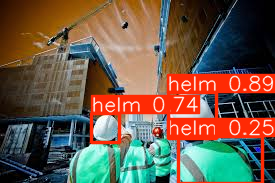

In [21]:
model = YOLO(r'safety_helmet_detection_models/train_trial_10/weights/best.onnx')

img_path = 'download (5).jpeg'
results = model.predict(img_path, save=False)

annotated_frame = results[0].plot()
image_pil = Image.fromarray(annotated_frame)

display(image_pil)